In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [6]:
d = []
b =[]

In [7]:
def plot_roc_curve(model, X_test, y_test, model_name, color):
    # Get the probability predictions for the positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Compute AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimiza

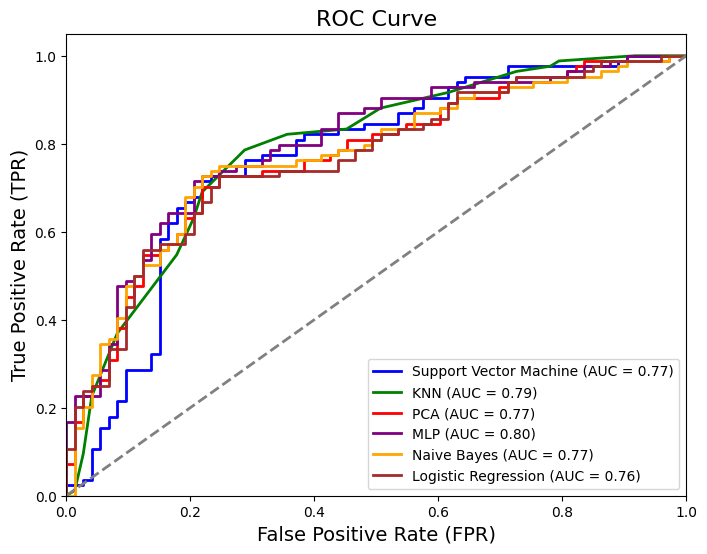

In [8]:
df = pd.read_csv(f'data/normalized/language2/merge2.csv')

df[f'gtrend_label'] = df[f'gtrend_label'].astype('category')
df[f'gtrend_label_encoded'] = df[f'gtrend_label'].cat.codes
X = df[[f'tiobe', 'wiki']]
y = df[f'gtrend_label_encoded']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

stratified_cv = StratifiedKFold(n_splits=10)

svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
svc_model = GridSearchCV(SVC(random_state=42, probability=True), svc_params, cv=stratified_cv, scoring='accuracy')
svc_model.fit(X_train, y_train)
best_svc_model = svc_model.best_estimator_
y_pred_svc = best_svc_model.predict(X_test)
svc_cv_scores = cross_val_score(best_svc_model, X, y, cv=stratified_cv, scoring='accuracy') 
d.append(svc_cv_scores.mean())
b.append(svc_model.best_score_)


knn_params = {'n_neighbors': list(range(1, 21)), 'weights': ['uniform', 'distance']}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=stratified_cv, scoring='accuracy')
knn_model.fit(X_train, y_train)
best_knn_model = knn_model.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)
knn_cv_scores = cross_val_score(best_knn_model, X, y, cv=stratified_cv, scoring='accuracy') 
d.append(knn_cv_scores.mean())
b.append(knn_model.best_score_)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

pca_mlp_params = {'hidden_layer_sizes': [(50, 50), (100,), (50, 100, 50)], 'activation': ['relu', 'tanh'], 'max_iter': [500, 1000]}
pca_mlp_model = GridSearchCV(MLPClassifier(random_state=42), pca_mlp_params, cv=stratified_cv, scoring='accuracy')
pca_mlp_model.fit(X_train_pca, y_train_pca)
best_pca_mlp_model = pca_mlp_model.best_estimator_
y_pred_pca_mlp = best_pca_mlp_model.predict(X_test)
pca_mlp_cv_scores = cross_val_score(best_pca_mlp_model, X, y, cv=stratified_cv, scoring='accuracy') 
d.append(pca_mlp_cv_scores.mean())
b.append(pca_mlp_model.best_score_)



mlp_model = GridSearchCV(MLPClassifier(random_state=42), pca_mlp_params, cv=stratified_cv, scoring='accuracy')
mlp_model.fit(X_train, y_train)
best_mlp_model = mlp_model.best_estimator_
y_pred_mlp = best_mlp_model.predict(X_test)
mlp_cv_scores = cross_val_score(best_mlp_model, X, y, cv=stratified_cv, scoring='accuracy') 
d.append(mlp_cv_scores.mean())
b.append(mlp_model.best_score_)


nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_cv_scores = cross_val_score(nb_model, X, y, cv=stratified_cv, scoring='accuracy')
d.append(nb_cv_scores.mean())
b.append(max(nb_cv_scores))


lr_params = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
lr_model = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), lr_params, cv=stratified_cv, scoring='accuracy')
lr_model.fit(X_train, y_train)
best_lr_model = lr_model.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)
lr_cv_scores = cross_val_score(best_lr_model, X, y, cv=stratified_cv, scoring='accuracy') 
d.append(lr_cv_scores.mean())
b.append(lr_model.best_score_)


plt.figure(figsize=(8, 6))

plot_roc_curve(svc_model, X_test, y_test, 'Support Vector Machine', color='blue')
plot_roc_curve(knn_model, X_test, y_test, 'KNN', color='green')
plot_roc_curve(pca_mlp_model, X_test, y_test, 'PCA', color='red')
plot_roc_curve(mlp_model, X_test, y_test, 'MLP', color='purple')
plot_roc_curve(nb_model, X_test, y_test, 'Naive Bayes', color='orange')
plot_roc_curve(lr_model, X_test, y_test, 'Logistic Regression', color='brown')


plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (chance level)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()




In [9]:
print(f'Cross validation: {d}')
print(f'Best score: {b}')

Cross validation: [0.6633073677377475, 0.631434599156118, 0.6645245050308342, 0.667121064589419, 0.6669912366114898, 0.6644758195391107]
Best score: [0.7096006144393241, 0.6952636968766002, 0.7048387096774194, 0.703200204813108, 0.9615384615384616, 0.6793138760880696]
